# LABORATORIO 3 - Redes Convolucionales - SIS421
## Estudiante: Jhamil Crespo Rejas
## Carrera: Ingenieria en Ciencias de la Computacion

In [48]:
import torch
import torchvision

device = "cuda" if torch.cuda.is_available() else "cpu"

## Carga del dataset
* Definimos un `transform` para redimensionar las imagenes a 256x256 y convertirlas a tensores.
* Cargamos el dataset con `torchvision.datasets.ImageFolder` y le aplicamos el `transform` definido.
* Dividimos el dataset en un conjunto de entrenamiento y un conjunto de validación.
* Creamos `DataLoaders` para ambos conjuntos.
* Verificamos que las imagenes se cargaron correctamente.

In [11]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

# Transformaciones a aplicar a las imágenes
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Redimensiona las imágenes a 256x256 píxeles	
    transforms.ToTensor(),  # Convertir las imágenes en tensores
])

# Cargando el dataset completo desde la carpeta en donde estan almacenadas las imágenes
dataset = torchvision.datasets.ImageFolder(root=r"C:\Users\Jhamil\Desktop\Dataset10mil", transform=transform)

# Dividiendo el dataset en 80% para entrenamiento y 20% para prueba
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
trainset, testset = random_split(dataset, [train_size, test_size])

# Creando DataLoaders para entrenamiento y prueba
trainloader = DataLoader(trainset, batch_size=16, shuffle=True)
testloader = DataLoader(testset, batch_size=16, shuffle=False)

# Clases del dataset
classes = ('AmorSeco', 'Boldo', 'Charanguillo', 'Ortiga', 'Perejil')

# Tamaño de los datasets
print(f'Tamaño del set de entrenamiento: {len(trainset)}')
print(f'Tamaño del set de prueba: {len(testset)}')


Tamaño del set de entrenamiento: 8038
Tamaño del set de prueba: 2010


* Visualizamos algunas imagenes del dataset.

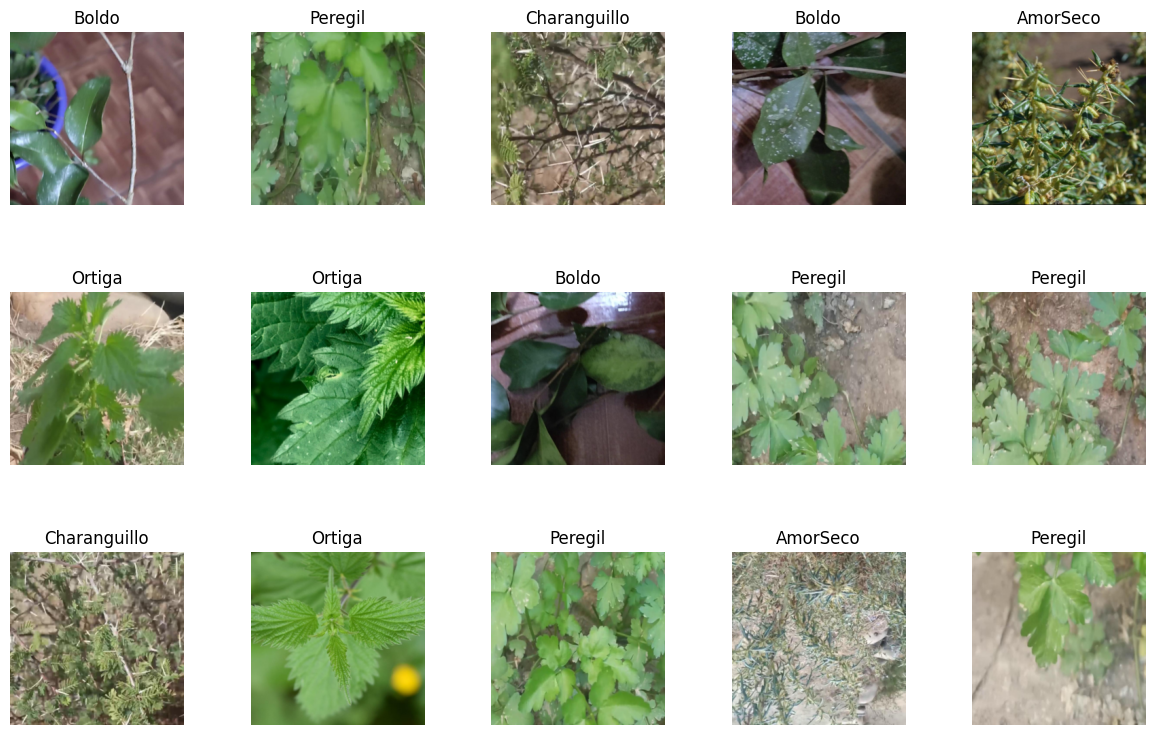

In [12]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Función para deshacer la transformación y convertir de tensor a imagen
def imshow(img):
    # Convirtiendo de tensor a numpy y cambiar el orden de los canales de (C, H, W) a (H, W, C)
    img = img.numpy().transpose((1, 2, 0))
    # Normalizando los valores de la imagen al rango [0, 1]
    img = np.clip(img, 0, 1)
    plt.imshow(img)

# Visualización de imágenes
r, c = 3, 5
plt.figure(figsize=(c * 3, r * 3))
for row in range(r):
    for col in range(c):
        index = c * row + col
        plt.subplot(r, c, index + 1)
        ix = random.randint(0, len(trainset) - 1)
        img, label = trainset[ix]
        imshow(img)
        plt.axis('off')
        plt.title(classes[label])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


* Verificamos que la distribución de las clases sea uniforme.

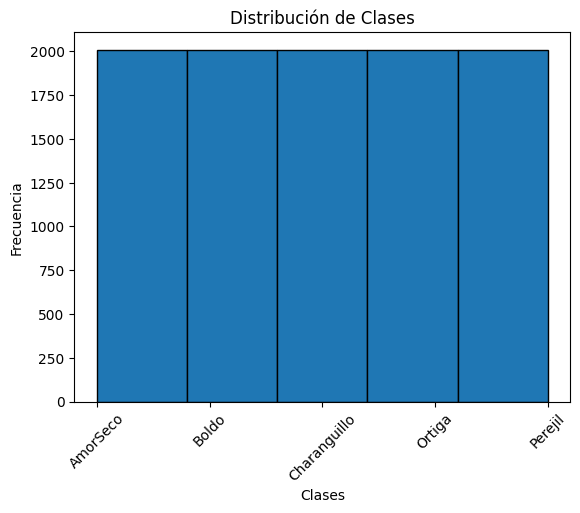

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener las etiquetas correspondientes a los índices de entrenamiento
train_labels = [label for _, label in dataset.samples]
train_labels = np.array(train_labels)

# Nombres de las clases
class_names = list(dataset.class_to_idx.keys())

# Distribución de clases - Mostrar histograma de las primeras 30,000 imágenes (o menos si hay menos en el set)
plt.hist(train_labels[:30000], bins=len(class_names), edgecolor='black')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.title('Distribución de Clases')
plt.show()


## Relizamos algunas pruebas
### Deteccion de bordes Horizontales
* Seleccionamos una imagen aleatoria del dataset y la convertimos a escala de grises ya que es un paso necesario antes de aplicar tecnicas de deteccion de bordes, ya que estas operaciones suelen trabajar mejor en imágenes monocromáticas.
* Definimos un kernel para la detección de bordes horizontales de 3x3. Los valores positivos en la parte superior (+1) y negativos en la inferior (-1) resaltan las transiciones de píxeles claros a oscuros en la dirección vertical.
* Aplicamos la convolución de la imagen con el kernel definido y mejoramos el contraste de los bordes detectados.

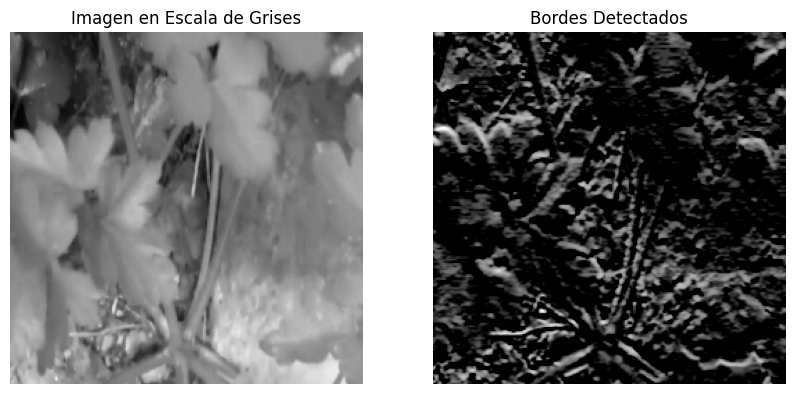

In [19]:
import numpy as np
import scipy.signal
from skimage import color
from skimage import exposure
import matplotlib.pyplot as plt
import random

# Seleccionando una imagen aleatoria del conjunto de entrenamiento
random_index = random.randint(0, len(trainset) - 1)
img, label = trainset[random_index]

# Convirtiendo de tensor a numpy y cambiando el orden de los canales de (Canales, H, W) a (H, W, Canales)
img = img.numpy().transpose((1, 2, 0))

# Convirtiendo la imagen a escala de grises
img_gray = color.rgb2gray(img)

# Definiendo el kernel para la detección de bordes horizontales
kernel = np.array([[1, 1, 1],
                   [0, 0, 0],
                   [-1, -1, -1]])

# Aplicando convolución 2D para detectar bordes
edges = scipy.signal.convolve2d(img_gray, kernel, 'valid')

# Mejorando el contraste de los bordes detectados
edges = exposure.equalize_adapthist(edges / np.max(np.abs(edges)), clip_limit=0.03)

# Visualizando la imagen original en escala de grises y los bordes detectados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(img_gray, cmap=plt.cm.gray)
ax1.set_title('Imagen en Escala de Grises')
ax1.axis('off')

ax2.imshow(edges, cmap=plt.cm.gray)
ax2.set_title('Bordes Detectados')
ax2.axis('off')

plt.show()


### Deteccion de bordes Verticales
* Seleccionamos una imagen aleatoria del dataset y la convertimos a escala de grises ya que es un paso necesario antes de aplicar tecnicas de deteccion de bordes, ya que estas operaciones suelen trabajar mejor en imágenes monocromáticas.
* Definimos un kernel para la detección de bordes verticales de 3x3. Los valores positivos en la columna izquierda (+1) y negativos en la columna derecha (-1) resaltan las transiciones de píxeles claros a oscuros en la dirección vertical.
* Aplicamos la convolución de la imagen con el kernel definido y mejoramos el contraste de los bordes detectados.

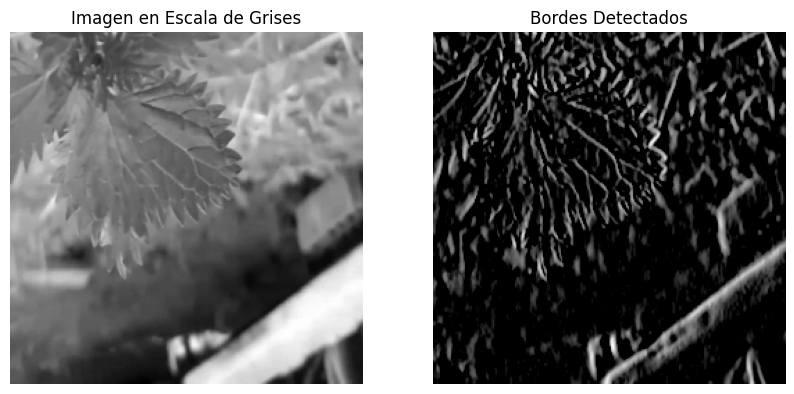

In [20]:
import numpy as np
import scipy.signal
from skimage import color
from skimage import exposure
import matplotlib.pyplot as plt
import random

# Seleccionando una imagen aleatoria del conjunto de entrenamiento
random_index = random.randint(0, len(trainset) - 1)
img, label = trainset[random_index]

# Convirtiendo de tensor a numpy y cambiar el orden de los canales de (C, H, W) a (H, W, C)
img = img.numpy().transpose((1, 2, 0))

# Convirtiendo la imagen a escala de grises
img_gray = color.rgb2gray(img)

# Definiendo el nuevo kernel para la detección de bordes
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# Aplicando convolución 2D para detectar bordes
edges = scipy.signal.convolve2d(img_gray, kernel, 'valid')

# Mejorando el contraste de los bordes detectados
edges = exposure.equalize_adapthist(edges / np.max(np.abs(edges)), clip_limit=0.03)

# Visualizando la imagen original en escala de grises y los bordes detectados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(img_gray, cmap=plt.cm.gray)
ax1.set_title('Imagen en Escala de Grises')
ax1.axis('off')

ax2.imshow(edges, cmap=plt.cm.gray)
ax2.set_title('Bordes Detectados')
ax2.axis('off')

plt.show()

### Deteccion de bordes en todas las direcciones
* Seleccionamos una imagen aleatoria del dataset y la convertimos a escala de grises ya que es un paso necesario antes de aplicar tecnicas de deteccion de bordes, ya que estas operaciones suelen trabajar mejor en imágenes monocromáticas.
* Definimos un kernel para la detección de bordes en todas las direcciones de 3x3. Este kernel es un operador Laplaciano de 3x3 que detecta cambios en todas las direcciones (horizontal, vertical y diagonal). Tiene un valor central más alto (+4) rodeado por valores negativos (-1). Esto realza todos los bordes independientemente de su orientación.
* Aplicamos la convolución de la imagen con el kernel definido y mejoramos el contraste de los bordes detectados.

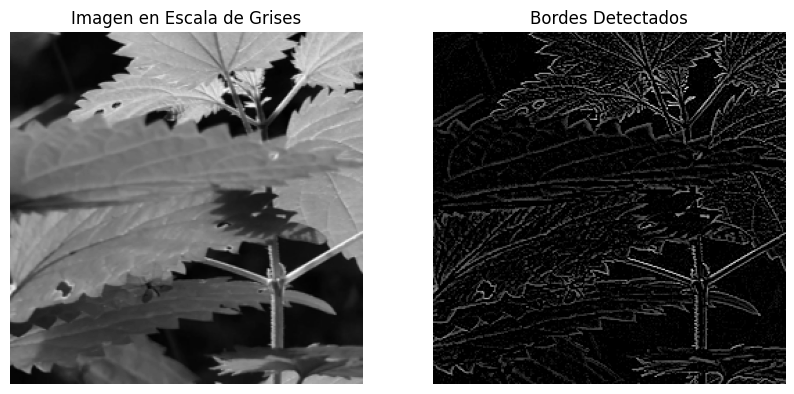

In [21]:
import numpy as np
import scipy.signal
from skimage import color
from skimage import exposure
import matplotlib.pyplot as plt
import random

# Seleccionando una imagen aleatoria del conjunto de entrenamiento
random_index = random.randint(0, len(trainset) - 1)
img, label = trainset[random_index]

# Convirtiendo de tensor a numpy y cambiar el orden de los canales de (C, H, W) a (H, W, C)
img = img.numpy().transpose((1, 2, 0))

# Convirtiendo la imagen a escala de grises
img_gray = color.rgb2gray(img)

# Definiendo el nuevo kernel para la detección de bordes
kernel = np.array([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]])

# Aplicando convolución 2D para detectar bordes
edges = scipy.signal.convolve2d(img_gray, kernel, 'valid')

# Mejorando el contraste de los bordes detectados
edges = exposure.equalize_adapthist(edges / np.max(np.abs(edges)), clip_limit=0.03)

# Visualizando la imagen original en escala de grises y los bordes detectados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(img_gray, cmap=plt.cm.gray)
ax1.set_title('Imagen en Escala de Grises')
ax1.axis('off')

ax2.imshow(edges, cmap=plt.cm.gray)
ax2.set_title('Bordes Detectados')
ax2.axis('off')

plt.show()

## Utilizando Pytorch para realizar CNNs
* Se prepara una imagen para que pueda ser compatible con el formato esperado por PyTorch.
* Se define una capa de convolucion con 3 canales de entrada, 10 canales de salida (uno por cada filtro) y un kernel de 3x3.
* Se imprime las dimensiones de salida, observando que el tamaño de la imagen se ha reducido.

In [22]:
import torch
import torch.nn as nn
import numpy as np

# Seleccionando una imagen aleatoria del conjunto de entrenamiento
random_index = random.randint(0, len(trainset) - 1)
img, label = trainset[random_index]

# Convirtiendo de tensor a numpy y cambiar el orden de los canales de (C, H, W) a (H, W, C)
img = img.numpy().transpose((1, 2, 0))

# Convirtiendo la imagen a tensor y añadir la dimensión del batch
img_tensor = torch.tensor(img).float().permute(2, 0, 1).unsqueeze(0)

# Definiendo la capa de convolución
conv = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3)

# Aplicando la convolución
output = conv(img_tensor)

# Imprimiendo las dimensiones del tensor de salida
print("Dimensiones de la salida:", output.shape)

Dimensiones de la salida: torch.Size([1, 10, 254, 254])


* Definimos otra capa de 3 canales de entrada, 10 canales de salida, un kernel de 3x3, un padding de 1 y un stride de 1, para demostrar que cuando el padding y el stride tienen el valor de uno, el tamaño de la imagen de salida es el mismo que el de la imagen de entrada.

In [24]:
conv = torch.nn.Conv2d(in_channels = 3, out_channels = 10, kernel_size = 3, padding = 1, stride = 1)
# Aplicando la convolución
output = conv(img_tensor)

# Imprimiendo las dimensiones del tensor de salida
print("Dimensiones de la salida:", output.shape)

Dimensiones de la salida: torch.Size([1, 10, 256, 256])


* Se dedine otra capa de convolucion de 3 canales de entrada, 10 canales de salida, un kernel de 3x3, un padding de 1 y un stride de 2, para demostrar que cuando el stride es 2 y el padding es 1, el tamaño de la imagen de salida se reduce a la mitad.

In [25]:
conv = torch.nn.Conv2d(in_channels = 3, out_channels = 10, kernel_size = 3, padding = 1, stride = 2)

output = conv(img_tensor)

# dimensiones: (N, #filtros, H', W')
output.shape

torch.Size([1, 10, 128, 128])

## Pooling

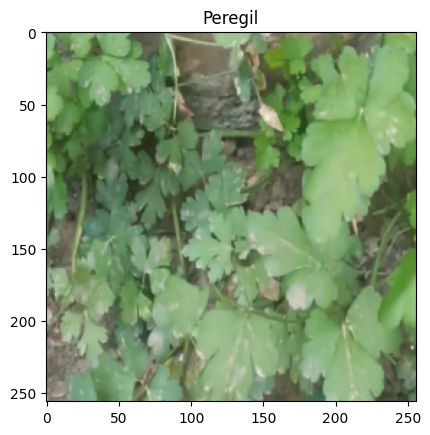

In [30]:
import random
import torch
import matplotlib.pyplot as plt
import numpy as np

# Seleccionando una imagen aleatoria del conjunto de entrenamiento
random_index = random.randint(0, len(trainset) - 1)
img, label = trainset[random_index]

# Convirtiendo de tensor a numpy y cambiar el orden de los canales de (C, H, W) a (H, W, C)
img = img.numpy().transpose((1, 2, 0))

# Mostrar la imagen original
plt.imshow(img)
plt.title(classes[label])
plt.show()

* Definimos una capa de max pooling con un tamaño de kernel de 3, un padding de 1 y un stride de 2. El max pooling reduce las dimensiones de la imagen al seleccionar el valor máximo dentro de cada submatriz del tamaño del kernel mientras se mueve a través de la imagen.
* El Pooling es útil para reducir la dimensionalidad de las características extraídas, manteniendo las más importantes.

In [31]:
# Definiendo la capa de max pooling
pool = torch.nn.MaxPool2d(3, padding=1, stride=2)

# Convirtiendo la imagen a tensor, normalizar y ajustar el formato
img_tensor = torch.from_numpy(img / 255.).unsqueeze(0).permute(0, 3, 1, 2).float()

# Aplicando el pooling
output = pool(img_tensor)
output.shape

torch.Size([1, 3, 128, 128])

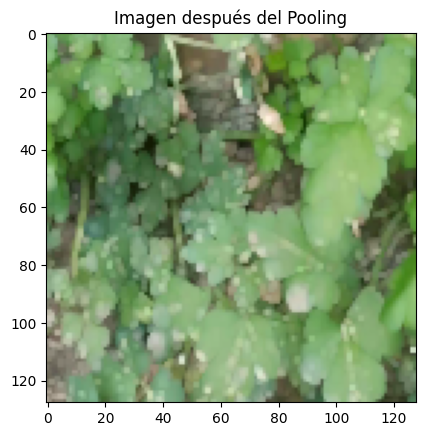

In [32]:
# Normalizar los valores de salida para visualización
output_np = output.squeeze(0).permute(1, 2, 0).detach().numpy()
output_np = (output_np - np.min(output_np)) / (np.max(output_np) - np.min(output_np))  # Normalización a [0, 1]

# Mostrar la imagen resultante después del pooling
plt.imshow(output_np)
plt.title('Imagen después del Pooling')
plt.show()

## Definimos el modelo de la CNN
`block`: 
* `torch.nn.Conv2d`: Una capa convolucional que aprendera los filtros de características.
* `torch.nn.ReLU()`: Para introducir no linealidad en el modelo.
* `torch.nn.MaxPool2d`: Una capa de max pooling que reduce la dimensionalidad de la imagen.
`block2`:
* `torch.nn.Linear`: Una capa densa que conecta todas las entradas con todas las salidas.
* `torch.nn.ReLU()`: Función de activación no lineal.

In [43]:
import torch

def block(c_in, c_out, k=3, p=1, s=1, pk=2, ps=2):
    return torch.nn.Sequential(
        torch.nn.Conv2d(c_in, c_out, k, padding=p, stride=s),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(pk, stride=ps)
    )

def block2(c_in, c_out):
    return torch.nn.Sequential(
        torch.nn.Linear(c_in, c_out),
        torch.nn.ReLU()
    )

class CNN(torch.nn.Module):
    def __init__(self, n_channels=3, n_outputs=5):  # n_channels set to 3 for RGB images
        super().__init__()
        self.conv1 = block(n_channels, 64)  
        self.conv2 = block(64, 128)         
        self.conv3 = block(128, 256)        

        self.fc = torch.nn.Linear(256 * 32 * 32, n_outputs)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.shape[0], -1)  # Flatten the tensor
        x = self.fc(x)
        return x


* Definimos la funcion de entrenamiento

In [44]:
from tqdm import tqdm
import numpy as np

def fit(model, dataloader, epochs=5):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

* Cargamos el dataset de las imagenes y creamos los dataloaders dentro de un diccionario.

In [45]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

# Transformaciones a aplicar a las imágenes
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Redimensionar las imágenes a 256x256 píxeles
    transforms.ToTensor(),  # Convertir las imágenes en tensores
])

# Cargar el dataset completo desde la carpeta
dataset = torchvision.datasets.ImageFolder(root=r"C:\Users\Jhamil\Desktop\Dataset10mil", transform=transform)

# Dividir el dataset en 80% para entrenamiento y 20% para prueba
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
trainset, testset = random_split(dataset, [train_size, test_size])

# Crear DataLoaders para entrenamiento y prueba
dataloader = {
    'train': DataLoader(trainset, batch_size=16, shuffle=True),
    'test': DataLoader(testset, batch_size=16, shuffle=False)
}

# Clases del dataset
classes = dataset.classes

# Tamaño de los datasets
print(f'Tamaño del set de entrenamiento: {len(trainset)}')
print(f'Tamaño del set de prueba: {len(testset)}')


Tamaño del set de entrenamiento: 8038
Tamaño del set de prueba: 2010


## Entrenamiento del modelo

In [49]:
model = CNN()
fit(model, dataloader)

val_loss 0.14982 val_acc 0.94911: 100%|██████████| 126/126 [00:17<00:00,  7.36it/s]


Epoch 1/5 loss 0.39237 val_loss 0.14982 acc 0.85363 val_acc 0.94911


val_loss 0.19257 val_acc 0.92956: 100%|██████████| 126/126 [00:24<00:00,  5.24it/s]


Epoch 2/5 loss 0.14982 val_loss 0.19257 acc 0.95117 val_acc 0.92956


val_loss 0.06453 val_acc 0.98264: 100%|██████████| 126/126 [00:16<00:00,  7.46it/s]


Epoch 3/5 loss 0.14515 val_loss 0.06453 acc 0.95664 val_acc 0.98264


val_loss 0.06787 val_acc 0.97470: 100%|██████████| 126/126 [00:33<00:00,  3.80it/s]


Epoch 4/5 loss 0.06594 val_loss 0.06787 acc 0.97888 val_acc 0.97470


val_loss 0.05298 val_acc 0.97867: 100%|██████████| 126/126 [00:15<00:00,  8.22it/s]

Epoch 5/5 loss 0.08547 val_loss 0.05298 acc 0.97453 val_acc 0.97867


* Guardamos el modelo para poder cargarlo despues

In [50]:
# Ruta donde se guardará el modelo
path = r"C:\Users\Jhamil\Desktop\Modelos\model_convolucional.pth"

# Guardar el estado del modelo
torch.save(model.state_dict(), path)

* Cargamos el modelo guardado

In [53]:
# Define el dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Crea una nueva instancia del modelo
model = CNN()  # Asegúrate de usar los mismos parámetros

# Ruta del archivo donde se guardó el modelo
path = r"C:\Users\Jhamil\Desktop\Modelos\model_convolucional.pth"

# Cargar el estado del modelo
model.load_state_dict(torch.load(path))
model.to(device)

# Configurar el modelo en modo evaluación
model.eval()

C:\Users\Jhamil\AppData\Local\Temp\ipykernel_16108\750912298.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=262144, out_features=5, bias=True)
)

## Prediccion
Realizamos una prueba de prediccion con una variedad de imagenes, que no estaban el dataset, para evaluar al modelo.

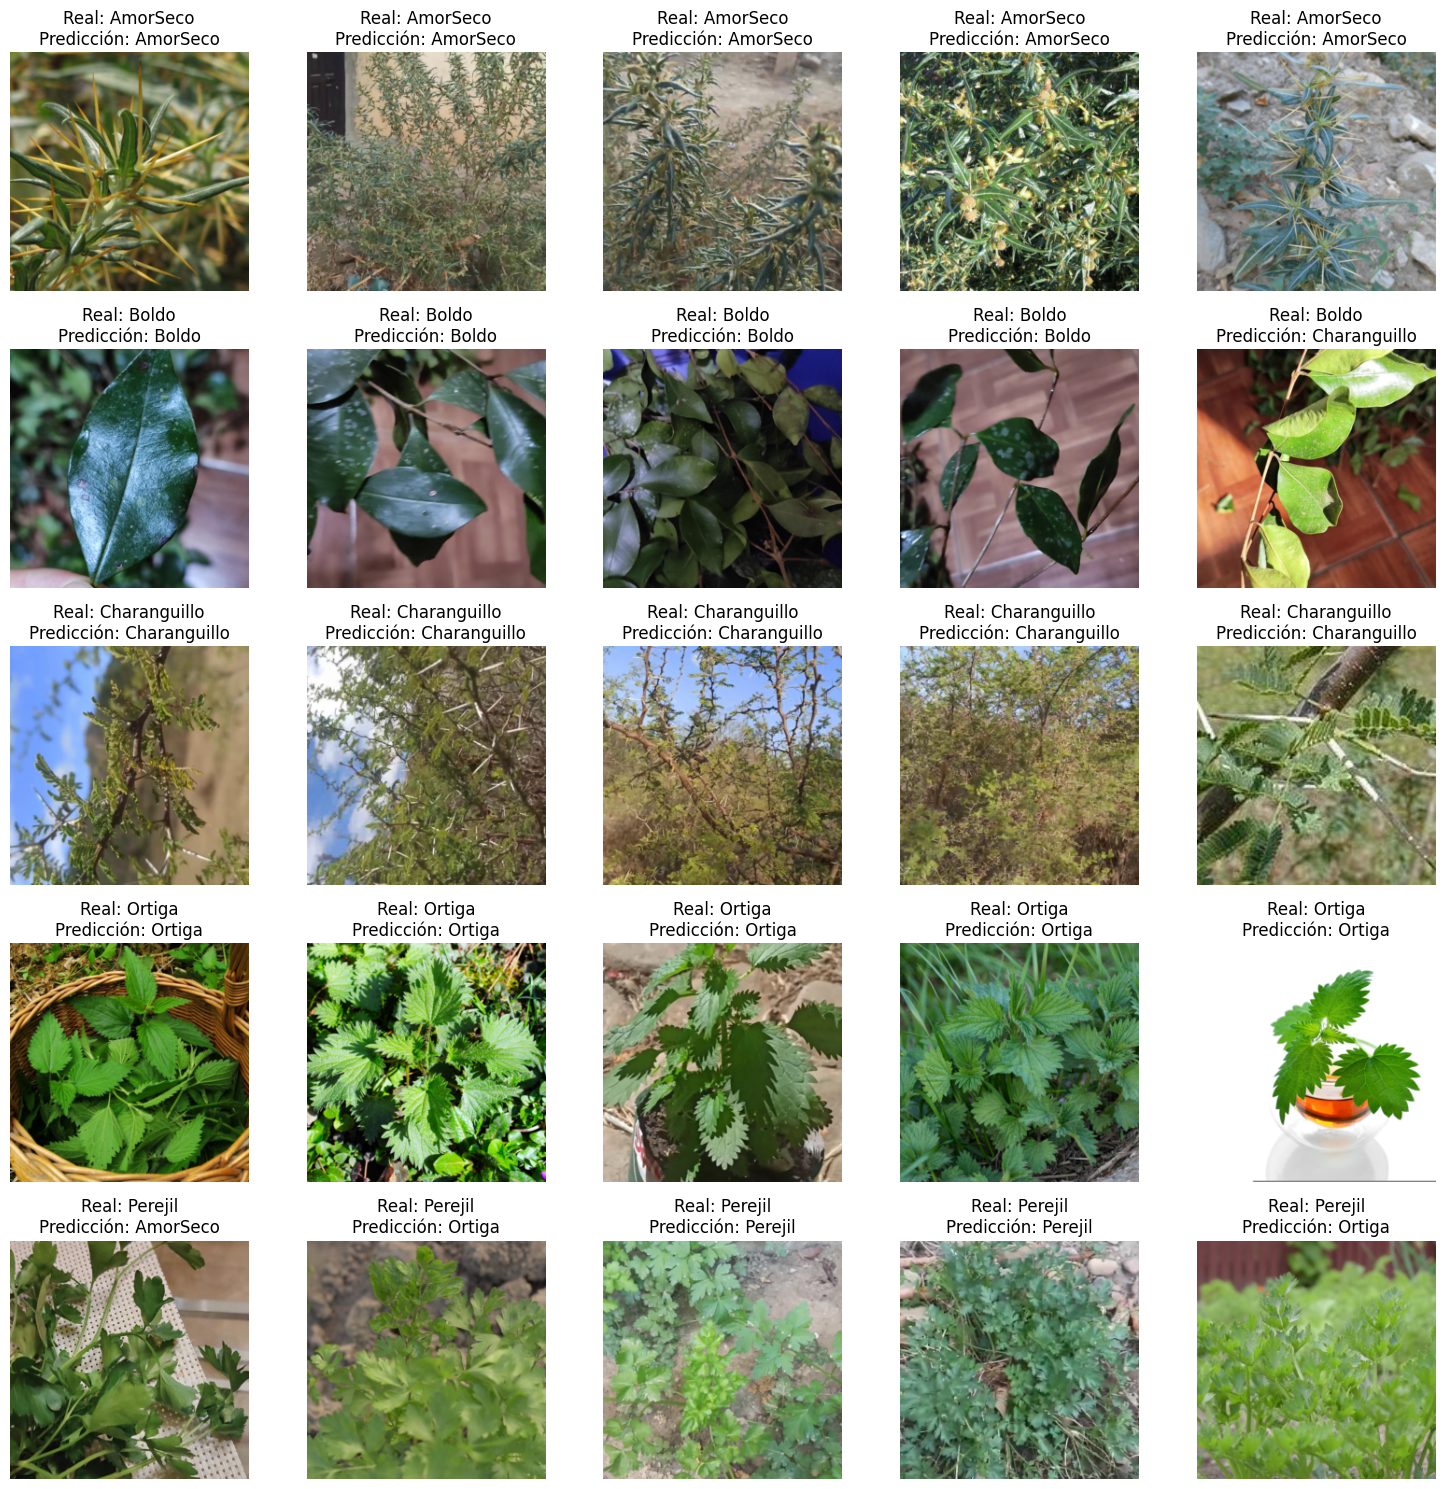

In [55]:
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

# Definir las transformaciones (deben ser las mismas que se usaron para el entrenamiento)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Ruta a la carpeta que contiene las imágenes para prueba
test_folder = r"C:\Users\Jhamil\Desktop\ImagenesPrueba"

# Cargar las imágenes
test_dataset = datasets.ImageFolder(root=test_folder, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Función para mostrar una cuadrícula de imágenes con sus etiquetas reales y predicciones
def show_images_grid(images, labels, predictions, class_names, num_columns=5):
    num_images = len(images)
    num_rows = (num_images + num_columns - 1) // num_columns  # Calcular el número de filas
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 3))
    axes = axes.flatten()
    
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i].permute(1, 2, 0))  # Convertir tensor a imagen
        ax.set_title(f'Real: {class_names[labels[i]]}\nPredicción: {class_names[predictions[i]]}')
        ax.axis('off')
    
    for j in range(num_images, len(axes)):  # Ocultar ejes adicionales
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Obtener las clases
class_names = test_dataset.classes

# Realizar inferencias y almacenar resultados
images_list = []
labels_list = []
predictions_list = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)  # Mover imágenes y etiquetas al dispositivo
        # Hacer predicción
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        
        # Almacenar imágenes, etiquetas reales y predicciones
        images_list.append(images[0].cpu())  # Obtener la imagen de tamaño de lote 1
        labels_list.append(labels[0].item())  # Obtener la etiqueta real
        predictions_list.append(preds[0].item())  # Obtener la predicción

# Mostrar las imágenes en una cuadrícula de 5 columnas
show_images_grid(images_list, labels_list, predictions_list, class_names, num_columns=5)
